# knn_분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
# 한글 폰트 적용
matplotlib.rc('font', family = 'Nanumgothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
import statsmodels.formula.api as smf


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.  
데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)  
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)   


In [2]:
df_raw = pd.read_csv('./Data/유방암.csv', engine = 'python', encoding = 'cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 결측치 확인

In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### X, Y 변수 지정 및 train, test data 나누기

In [7]:
df_raw_x = df_raw.drop('diagnosis', axis = 1)
df_raw_y = df_raw['diagnosis']
df_raw_y = np.where(df_raw_y == '음성', 0, 1)

In [19]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state
print('train data x size: {}'.format(df_train_x.shape))
print('train data y size: {}'.format(df_train_y.shape))
print('test data  x size: {}'.format(df_test_x.shape))
print('test data  y size: {}'.format(df_test_y.shape))

train data x size: (192, 30)
train data y size: (192,)
test data  x size: (128, 30)
test data  y size: (128,)


### default 모델에 대한 성능

In [20]:
knn_uncostomized = KNeighborsClassifier()
knn_uncostomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(knn_uncostomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncostomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.932
Accuracy on test set:0.914


training 정확도와 test 데이터에 대한 정확도 차이를 보아 다소 과적합된 것을 확인할 수 있다.

**이웃 수 증가에 따른 정확도 변화**

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors "] = para_n_neighbors 
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_neighbors .round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


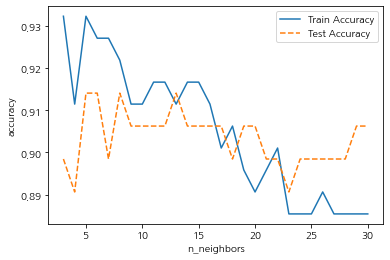

In [22]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

k가 14일 때, train과 test accuracy가 모두 높으면서 차이가 작아서 k는 14로 설정할 수 있다.

**가중치별 이웃 수 증가에 따른 정확도 변화**

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)] * 2

para_weights = (['uniform']) * 28 + (['distance']) * 28

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


distance에 따라 가중치를 줄 경우 train 데이터에 대한 과적합이 발생한다.

In [24]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',
                                                     columns = 'Weights', values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

In [25]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


<AxesSubplot:xlabel='Neighbors'>

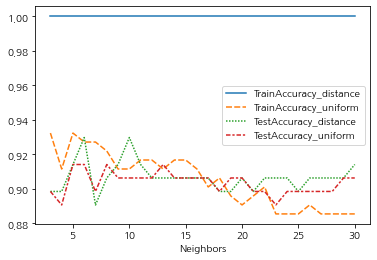

In [26]:
sns.lineplot(data = df_accuracy_weights_pivot)

distance에 따라 가중치를 줄 경우 과적합이 발생하므로 가중치는 uniform 으로 지정

**거리 계산 방법별 이웃 수 증가에 따른 정확도 변화**

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)] * 3

para_metric = (['minkowski']) * 28 +(['euclidean']) * 28+ (['manhattan']) * 28 
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric= v_metric, weights = 'uniform' )
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_metric.round(3)

#   


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.932,0.898
1,4,minkowski,0.911,0.891
2,5,minkowski,0.932,0.914
3,6,minkowski,0.927,0.914
4,7,minkowski,0.927,0.898
...,...,...,...,...
79,26,manhattan,0.896,0.898
80,27,manhattan,0.896,0.906
81,28,manhattan,0.896,0.906
82,29,manhattan,0.885,0.906


<AxesSubplot:xlabel='Neighbors'>

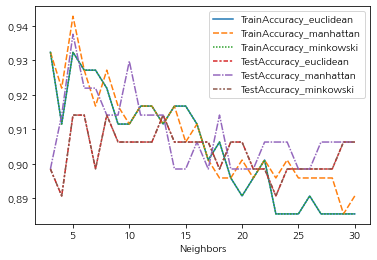

In [28]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors',
                                                     columns = 'Metric', values = ['TrainAccuracy', 'TestAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

manhattan 방식이 train과 test의 차이가 가장 작은 것을 볼 수 있다. 따라서 거리 계산 방식은 manhattan으로 설정한다.

### 최종 모델

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 14, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print('train data accuracy: {:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
print('teset data accuracy: {:.3f}'.format(knn_model.score(df_test_x, df_test_y)))

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy: 0.917
teset data accuracy: 0.898
Confusion matrix: 
[[92  5]
 [ 8 23]]


> 결론  
최종 모델의 경우 k는 14, 거리 계산방식은 manhattan, 그리고 가중치 없이 설정하였다. 해당 모델의 경우 train과 test 데이터 모두 정확도가 90% 이상으로 나왔다. 암진단 모델에서 양성인데 음성으로 판단할 확률은 25% 정도이며 실제 상황에서 쓰기는 어렵다고 생각된다.